# Data Augmentation
データの水増し

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from PIL import Image
from pathlib import Path

train_path = Path('../hymenoptera_data/train/')

assert train_path.exists(), f'{train_path.name} does not exist'

file_path_list = list(train_path.glob('**/*.jpg'))

# Dataset

In [15]:
import sys
sys.path.append('../')

from script.dataset import myDataset
from torchvision import transforms

train_transform = transforms.Compose([
])

train_dataset = myDataset(train_path, train_transform)
image, label = train_dataset[0]

print(label)

0


## CenterCrop

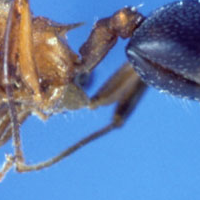

In [4]:
center_crop = transforms.CenterCrop(size=(200,200))
center_crop(image)

## RandomHorizontalFlip

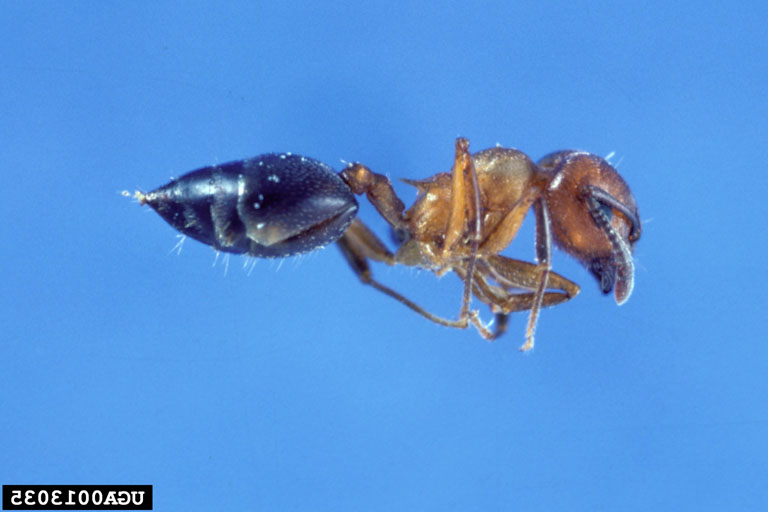

In [5]:
random_horizontal_flip = transforms.RandomHorizontalFlip()
random_horizontal_flip(image)

## Grayscale

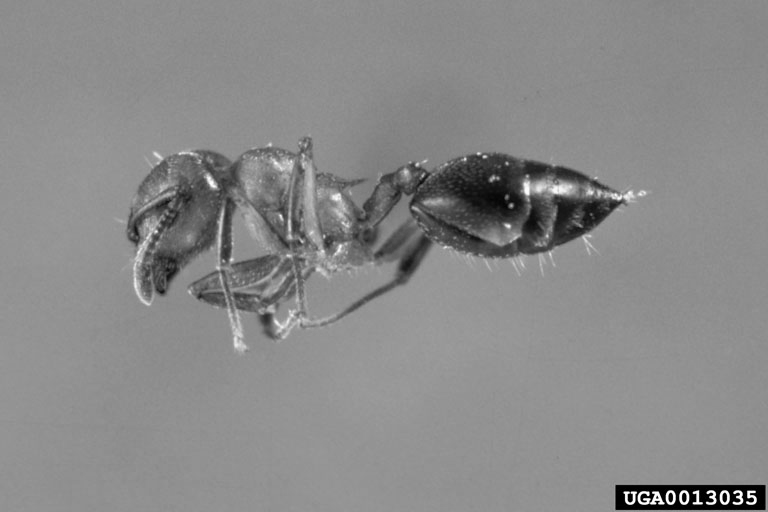

In [6]:
gray_scale = transforms.Grayscale()
gray_scale(image)

## RandomRotation

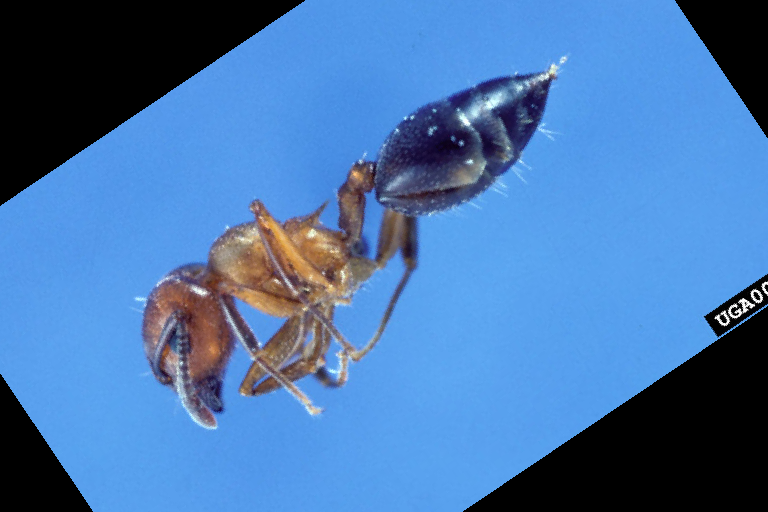

In [7]:
random_rotation = transforms.RandomRotation((0, 90))
random_rotation(image)

## Compose

In [20]:
compose = transforms.Compose([
    transforms.RandomResizedCrop(size=(100, 100)),
    transforms.RandomHorizontalFlip()
    transforms.ToTensor()
])
image2 = compose(image)
image2.size

(100, 100)

In [16]:
def compare_to_transform(image, transform):
    plt.subplot(1, 2, 1)
    plt.title('RawImage')
    plt.imshow(image)

    image_transformed = transform(image)

    plt.subplot(1, 2, 2)
    plt.title(transform.__class__.__name__)
    plt.imshow(image_transformed)
    plt.show()

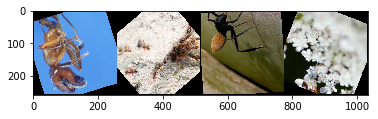

In [11]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# いくつかのtransformを組み合わせてみる
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(256, 256), scale=(0,1)),
    transforms.RandomRotation(degrees=[30, 270]),
    transforms.ToTensor()
])

train_dataset = myDataset(train_path, train_transform)

train_loader = DataLoader(train_dataset, batch_size=4)
images, labels = next(iter(train_loader))

out = make_grid(images)
npimg = out.numpy().transpose(1, 2, 0)

plt.imshow(npimg)
plt.show()